In [7]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
income_raw = pd.read_csv("formatted/median_income.csv")
income_raw.head()

,State,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,United States,59039,56516,53657,53585,51017,50054,49276,49777,50303,...,31241,30636,30126,29943,28906,27225,26061,24897,23618,22415
1,AL,47221,44509,42278,47320,43464,42590,40933,39980,44476,...,25082,25808,24346,23357,21284,19948,19734,19132,18333,17310
2,AK,75723,75112,67629,72472,63648,57431,57848,61604,63989,...,42931,41802,40612,39298,36006,33103,33233,31356,34782,32356
3,AZ,57100,52248,49254,52611,47044,48621,46896,45739,46914,...,30510,29358,30737,29224,28552,26435,26749,25500,23877,21425
4,AR,45907,42798,44922,39376,39018,41302,38587,36538,39586,...,23039,23882,23435,22786,21433,20172,18827,18730,17451,15674


In [9]:
tidy_income = pd.melt(income_raw, id_vars = ['State'], var_name='Year', value_name='income_rate')
tidy_income.sort_values(by=['State','Year'], inplace=True)
tidy_income.head()

,State,Year,income_rate
1666,AK,1984,32356
1614,AK,1985,34782
1562,AK,1986,31356
1510,AK,1987,33233
1458,AK,1988,33103


In [10]:
income_matrix = tidy_income.pivot("State", "Year", "income_rate")
income_matrix.head()

Year,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,,,,,,,,,,,,,,,,,,,,,
AK,32356,34782,31356,33233,33103,36006,39298,40612,41802,42931,...,62993,63989,61604,57848,57431,63648,72472,67629,75112,75723
AL,17310,18333,19132,19734,19948,21284,23357,24346,25808,25082,...,42212,44476,39980,40933,42590,43464,47320,42278,44509,47221
AR,15674,17451,18730,18827,20172,21433,22786,23435,23882,23039,...,40795,39586,36538,38587,41302,39018,39376,44922,42798,45907
AZ,21425,23877,25500,26749,26435,28552,29224,30737,29358,30510,...,47215,46914,45739,46896,48621,47044,52611,49254,52248,57100
CA,25287,26981,29010,30146,30287,33009,33290,33664,34903,34073,...,55734,57014,56134,54283,53367,57020,60794,60487,63636,66637


Text(0.5,1,'Heatmap of income rate from 1984 to 2016')

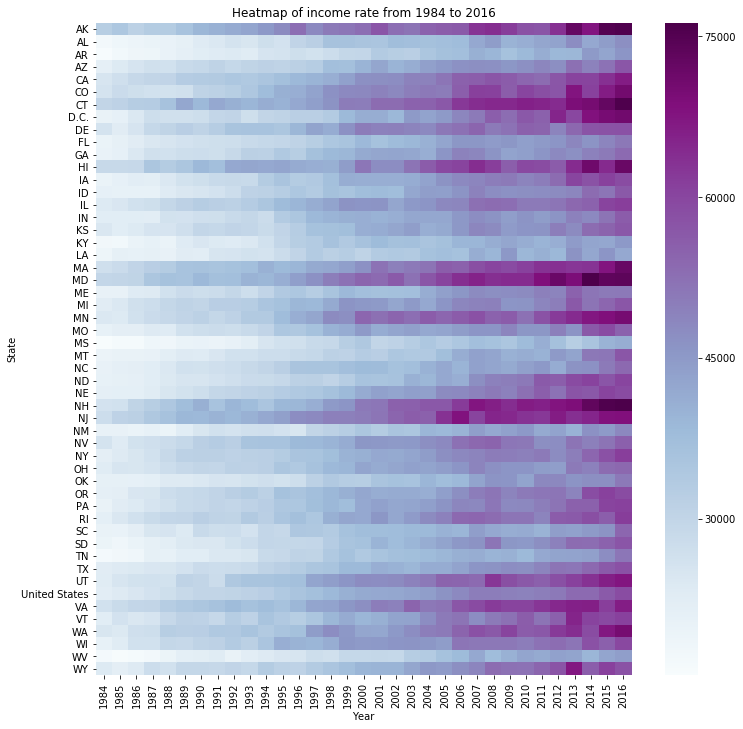

In [11]:
import seaborn as sns
fig = plt.figure(figsize=(12,12))
r = sns.heatmap(income_matrix, cmap='BuPu')
r.set_title("Heatmap of income rate from 1984 to 2016")

In [12]:
fig.savefig("Output/heatmap_income.png")